In [1]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import hashlib
import shutil
import cv2

In [2]:
classes = ['web','android']
dataset_path = "datasets/"
data = []
for cls in classes:
    input_path = dataset_path+cls+"/all_data"
    for f in os.listdir(input_path):
        if f.find(".gui") != -1:
            path_gui = "{}/{}".format(input_path, f)
            file_name = f[:f.find(".gui")]

            if os.path.isfile("{}/{}.png".format(input_path, file_name)):
                path_img = "{}/{}.png".format(input_path, file_name)
                data.append([file_name,cls])
print("Dataset Read Complete")

Dataset Read Complete


In [3]:
data = pd.DataFrame(data,columns=['Filename','Class'])
data.head()

,Filename,Class
0,00150311-A7AE-4804-8B7D-9273687B4FC0,web
1,00190F39-0DE9-47EB-B0C2-856FDD3ACE62,web
2,00779BBE-DD64-4909-9909-24F5C8044A7B,web
3,00CDC9A8-3D73-4291-90EF-49178E408797,web
4,00E15BB2-5568-4466-BA18-A8A8D34FC61C,web


Total number of records: 3500
Total number of Web Images: 1750
Total number of Android Images: 1750
['web' 'android']

There are no missing values in the dataset


Text(0, 0.5, 'Number of Images')

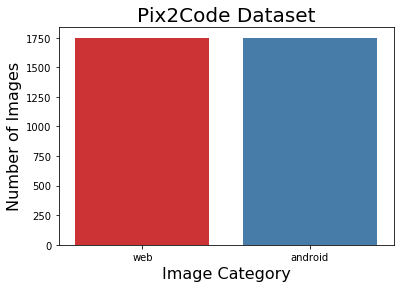

In [4]:
y = data['Class']
X = data.drop('Class', axis=1)
labels = data['Class'].unique()
n_records = len(data)
web = len(data[data['Class'] == "web"])
android = len(data[data['Class'] == "android"])
print("Total number of records: {}".format(n_records))
print("Total number of Web Images: {}".format(web))
print("Total number of Android Images: {}".format(android))
print(labels)
missing_values = data.isnull().sum().sum()
if missing_values == 0:
    print("\nThere are no missing values in the dataset")
else:
    print("\nThe dataset has {} missing values".format(missing_values))

plt.figure(figsize=(6,4))
sns.countplot(y, order=labels, palette='Set1')
plt.title('Pix2Code Dataset',fontsize=20)
plt.xlabel('Image Category', fontsize=16)
plt.ylabel('Number of Images', fontsize=16)

In [5]:
webpaths = list(data.loc[(data.Class == 'web')]['Filename'])
androidpaths = list(data.loc[(data.Class == 'android')]['Filename'])

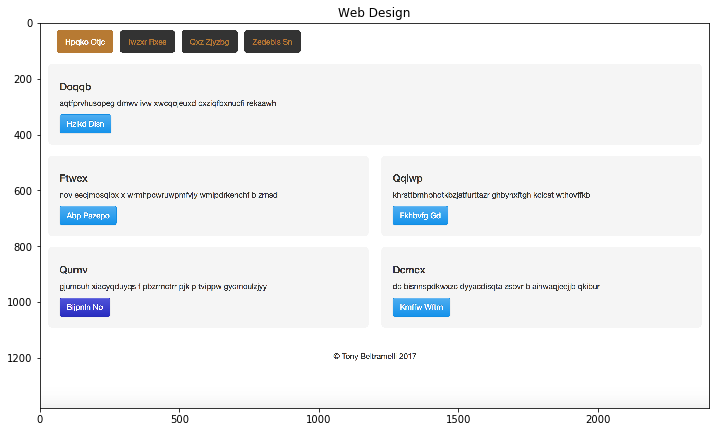

In [6]:
webimg ="datasets/web/all_data/"+webpaths[0]+".png"
img = cv2.imread(webimg)
plt.figure(figsize=(12,12))
plt.imshow(img)
plt.title('Web Design')
plt.show()

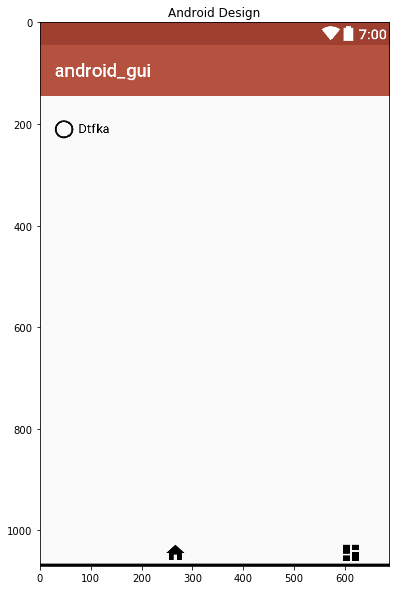

In [7]:
androidimg ="datasets/android/all_data/"+androidpaths[0]+".png"
img = cv2.imread(androidimg)
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.title('Android Design')
plt.show()

In [8]:


distribution = 6
TRAINING_SET_NAME = "training_set"
EVALUATION_SET_NAME = "eval_set"

evaluation_samples_number = len(webpaths) / (distribution + 1)
training_samples_number = evaluation_samples_number * distribution


print("Splitting datasets, training samples: {}, evaluation samples: {}".format(training_samples_number, evaluation_samples_number))

Splitting datasets, training samples: 1500.0, evaluation samples: 250.0


In [9]:
input_path = "datasets/web/all_data"
np.random.shuffle(webpaths)

eval_set = []
train_set = []

hashes = []
for path in webpaths:
    if sys.version_info >= (3,):
        f = open("{}/{}.gui".format(input_path, path), 'r', encoding='utf-8')
    else:
        f = open("{}/{}.gui".format(input_path, path), 'r')

    with f:
        chars = ""
        for line in f:
            chars += line
        content_hash = chars.replace(" ", "").replace("\n", "")
        content_hash = hashlib.sha256(content_hash.encode('utf-8')).hexdigest()

        if len(eval_set) == evaluation_samples_number:
            train_set.append(path)
        else:
            is_unique = True
            for h in hashes:
                if h is content_hash:
                    is_unique = False
                    break

            if is_unique:
                eval_set.append(path)
            else:
                train_set.append(path)

        hashes.append(content_hash)

print(len(eval_set),len(train_set))

250 1500


In [10]:
if not os.path.exists("{}/{}".format(os.path.dirname(input_path), EVALUATION_SET_NAME)):
    os.makedirs("{}/{}".format(os.path.dirname(input_path), EVALUATION_SET_NAME))

if not os.path.exists("{}/{}".format(os.path.dirname(input_path), TRAINING_SET_NAME)):
    os.makedirs("{}/{}".format(os.path.dirname(input_path), TRAINING_SET_NAME))

for path in eval_set:
    shutil.copyfile("{}/{}.png".format(input_path, path), "{}/{}/{}.png".format(os.path.dirname(input_path), EVALUATION_SET_NAME, path))
    shutil.copyfile("{}/{}.gui".format(input_path, path), "{}/{}/{}.gui".format(os.path.dirname(input_path), EVALUATION_SET_NAME, path))

for path in train_set:
    shutil.copyfile("{}/{}.png".format(input_path, path), "{}/{}/{}.png".format(os.path.dirname(input_path), TRAINING_SET_NAME, path))
    shutil.copyfile("{}/{}.gui".format(input_path, path), "{}/{}/{}.gui".format(os.path.dirname(input_path), TRAINING_SET_NAME, path))

print("Training dataset: {}/training_set".format(os.path.dirname(input_path), path))
print("Evaluation dataset: {}/eval_set".format(os.path.dirname(input_path), path))

Training dataset: datasets/web/training_set
Evaluation dataset: datasets/web/eval_set


In [11]:
input_path = "datasets/android/all_data"
np.random.shuffle(androidpaths)

eval_set = []
train_set = []

hashes = []
for path in androidpaths:
    if sys.version_info >= (3,):
        f = open("{}/{}.gui".format(input_path, path), 'r', encoding='utf-8')
    else:
        f = open("{}/{}.gui".format(input_path, path), 'r')

    with f:
        chars = ""
        for line in f:
            chars += line
        content_hash = chars.replace(" ", "").replace("\n", "")
        content_hash = hashlib.sha256(content_hash.encode('utf-8')).hexdigest()

        if len(eval_set) == evaluation_samples_number:
            train_set.append(path)
        else:
            is_unique = True
            for h in hashes:
                if h is content_hash:
                    is_unique = False
                    break

            if is_unique:
                eval_set.append(path)
            else:
                train_set.append(path)

        hashes.append(content_hash)

print(len(eval_set),len(train_set))

250 1500


In [12]:
if not os.path.exists("{}/{}".format(os.path.dirname(input_path), EVALUATION_SET_NAME)):
    os.makedirs("{}/{}".format(os.path.dirname(input_path), EVALUATION_SET_NAME))

if not os.path.exists("{}/{}".format(os.path.dirname(input_path), TRAINING_SET_NAME)):
    os.makedirs("{}/{}".format(os.path.dirname(input_path), TRAINING_SET_NAME))

for path in eval_set:
    shutil.copyfile("{}/{}.png".format(input_path, path), "{}/{}/{}.png".format(os.path.dirname(input_path), EVALUATION_SET_NAME, path))
    shutil.copyfile("{}/{}.gui".format(input_path, path), "{}/{}/{}.gui".format(os.path.dirname(input_path), EVALUATION_SET_NAME, path))

for path in train_set:
    shutil.copyfile("{}/{}.png".format(input_path, path), "{}/{}/{}.png".format(os.path.dirname(input_path), TRAINING_SET_NAME, path))
    shutil.copyfile("{}/{}.gui".format(input_path, path), "{}/{}/{}.gui".format(os.path.dirname(input_path), TRAINING_SET_NAME, path))

print("Training dataset: {}/training_set".format(os.path.dirname(input_path), path))
print("Evaluation dataset: {}/eval_set".format(os.path.dirname(input_path), path))

Training dataset: datasets/android/training_set
Evaluation dataset: datasets/android/eval_set
